In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1e-7

In [2]:
def thefunc(x, n, s):
    x = x + epsilon
    return -x * np.log2(x) - (1 - x) * np.log2(1 - x) + (
        1 - x) * np.log2(n - 1) - s

In [3]:
def get_max_predictability(N, S):
    ans = np.zeros(N.shape)
    for i in range(len(N)):
        x1 = 0.0
        x2 = 1.0
        s = 0.0
        while x2 - x1 > 1e-2:
            x0 = (x1 + x2) / 2
            if -x0 * np.log2(x0) - (1 - x0) * np.log2(1 - x0) + (
                    1 - x0) * np.log2(N[i] - 1) - S[i]> 0:
                x1 = x0
            else:
                x2 = x0
            s = x0
        # test accurancy
        if abs(-s*np.log2(s) - (1 - s) * np.log2(1-s) + (1 - s)*np.log2(N[i]-1) - S[i]) <= 1e-4:
            continue    
        ans[i] = s
    return ans

In [4]:
def Newton_iter(N,S):
    res = []
    for s,n in zip(S,N):
        x = 0.999
        for j in np.arange(0, 100):
            x = x + epsilon
            fx = -x*np.log2(x)-(1-x)*np.log2(1-x)+(1-x)*np.log2(n-1)-s
            fx2 = np.log2(1-x)-np.log2(x)-np.log2(n-1)
            if fx2!=0:
                x = x-fx/(fx2-epsilon)
            # print("x=", x)
            # print("fx=", fx)
            # print("fx2=", fx2)
        res.append(x)
    return res

(100,)


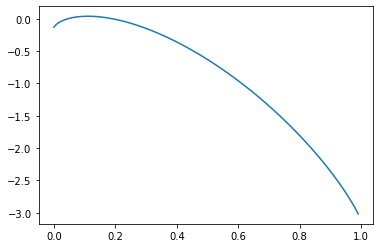

In [5]:
x = [i for i in range(0, 100, 1)]
x = np.array(x)
x = x / 100
y = thefunc(x, 9, 3.129113443222582)
print(y.shape)
plt.plot(x, y)
plt.show()

In [6]:
result = pd.read_csv('.\\resources\\entropy_1000.csv')

In [7]:
s_random = result.values[:, 0].reshape(-1)
s_real = result.values[:, 2].reshape(-1)
tmp_N = result.values[:,3].reshape(-1)

In [8]:
entropy_pair = []
S = []
N = []
for random,real,n in zip(s_random,s_real,tmp_N):
    if random > real:
        entropy_pair.append([random,real,n])
        S.append(real)
        N.append(n)

In [9]:
N = np.array(N)
S = np.array(S)

In [10]:
ans = get_max_predictability(N, S)
len(ans)

655

In [11]:
ans = Newton_iter(N,S)

(100,)


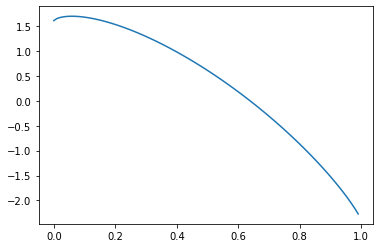

In [12]:
x = [i for i in range(0, 100, 1)]
x = np.array(x)
x = x / 100
y = thefunc(x, 17.0, 2.3905793235532107)
print(y.shape)
plt.plot(x, y)
plt.show()

In [13]:
ans

[0.6383634801129578,
 0.48252259704207223,
 0.6115286193892883,
 0.4904803861189648,
 0.3696608355565317,
 0.733295394804006,
 0.19256292454399704,
 0.5763845391653695,
 0.6449562094097885,
 0.718672778308167,
 0.7627499129069161,
 0.6933140716848507,
 0.5347099304322533,
 0.6320760731962978,
 0.4810829081913845,
 0.359828457963134,
 0.648962312295373,
 0.5360514978140802,
 0.6479855008461728,
 0.8095110483123013,
 0.7501853545493281,
 0.32424769157089434,
 0.3911357114295159,
 0.7371918506974493,
 0.7002183606879953,
 0.6419301712396172,
 0.5183236002702407,
 0.5313932919403858,
 0.4517797954998151,
 0.4445501165299472,
 0.45670424110780933,
 0.5552390706794206,
 0.41573519232203177,
 0.47236504234091503,
 0.6804341782150736,
 0.6611196559733795,
 0.5303487240826942,
 0.7614588265810536,
 0.7212810882631983,
 0.6149119820345877,
 0.6074502122621696,
 0.4574739045681647,
 0.6253144706586689,
 0.6785107101403923,
 0.7263232338955954,
 0.7212059473519079,
 0.5715839076892065,
 0.54894387